In [ ]:
pip install pandas yfinance matplotlib

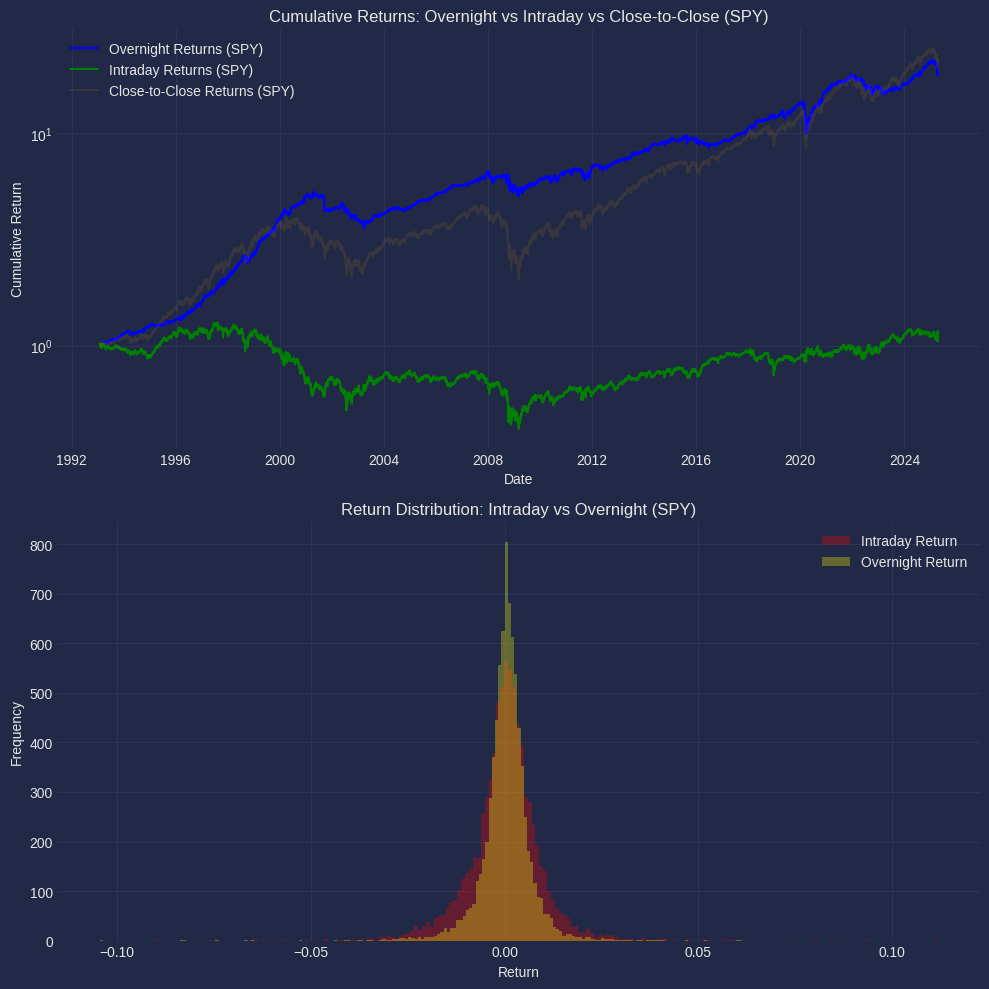

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_cumulative_returns_and_distribution(ticker: str = 'SPY', start: str = '2000-01-01', end: str = None):
    """
    Plots the cumulative returns for a given ticker over a specified period, comparing:
    - Overnight returns (previous close to open)
    - Intraday returns (open to close)
    - Close-to-Close returns
    Also plots the histogram of the distribution of intraday and overnight returns.

    Parameters:
    - ticker: The stock symbol to analyze (default 'SPY').
    - start: Start date of the period to analyze (default '2000-01-01').
    - end: End date of the period to analyze (default is today).
    """
    if end is None:
        end = datetime.now().strftime('%Y-%m-%d')

    # Step 1: Download historical data for the ticker
    data = yf.download(ticker, start=start, end=end, progress=False, auto_adjust=True)[['Open', 'Close']]

    # Step 2: Calculate the returns
    # Overnight return: from the previous day's adjusted close to the current day's open
    overnight_return = (data['Open'] / data['Close'].shift(1)) - 1.0

    # Intraday return: from the current day's open to the current day's adjusted close
    intraday_return = (data['Close'] / data['Open']) - 1.0

    # Close-to-Close return: from the previous day's adjusted close to the current day's adjusted close
    close_to_close_return = (data['Close'] / data['Close'].shift(1)) - 1.0

    # Step 4: Calculate cumulative returns for each
    cum_overnight_return = (1 + overnight_return).cumprod().fillna(1)
    cum_intraday_return = (1 + intraday_return).cumprod().fillna(1)
    cum_close_to_close_return = (1 + close_to_close_return).cumprod().fillna(1)

    # Step 5: Create subplots (2, 1)
    plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), tight_layout=True)

    # Subplot 1: Cumulative returns
    axs[0].plot(cum_overnight_return, label=f'Overnight Returns ({ticker})', color='blue')
    axs[0].plot(cum_intraday_return, label=f'Intraday Returns ({ticker})', color='green')
    axs[0].plot(cum_close_to_close_return, label=f'Close-to-Close Returns ({ticker})', color='orange', alpha=0.1)
    axs[0].set_title(f'Cumulative Returns: Overnight vs Intraday vs Close-to-Close ({ticker})')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Cumulative Return')
    axs[0].legend()
    axs[0].set_yscale('log')  # Set y-axis to logarithmic scale

    # Subplot 2: Histogram comparison of distributions
    axs[1].hist(intraday_return, bins=200, alpha=0.3, label='Intraday Return', color='red')
    axs[1].hist(overnight_return, bins=200, alpha=0.3, label='Overnight Return', color='yellow')
    axs[1].set_title(f'Return Distribution: Intraday vs Overnight ({ticker})')
    axs[1].set_xlabel('Return')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()
    plt.show()

plot_cumulative_returns_and_distribution(ticker='SPY', start='1980-01-01')